In [1]:
%matplotlib inline
import tensorflow as tf

from matplotlib import pyplot as plt

In [2]:
sess = tf.Session()

## tf.image.sample_distorted_bounding_box

In [3]:
image_data = tf.gfile.FastGFile("dog.jpg",'rb').read()

In [4]:
decoded_image_data = tf.image.decode_jpeg(image_data, channels=3)
image = tf.image.convert_image_dtype(decoded_image_data, dtype=tf.float32)

In [5]:
bbox = tf.constant([0.0, 0.0, 1.0, 1.0],
                 dtype=tf.float32,
                 shape=[1, 1, 4])

In [6]:
begin, size, bbox_for_draw = tf.image.sample_distorted_bounding_box(
    tf.shape(image), bounding_boxes=bbox, min_object_covered=0.1, 
    aspect_ratio_range=(0.75, 1.33),
    area_range=(0.05, 1.0),
    max_attempts=100,
    use_image_if_no_bounding_boxes=True)

In [7]:
image_with_box = tf.image.draw_bounding_boxes(tf.expand_dims(image,0),
                                                  bbox_for_draw)
cropped_image = tf.slice(image, begin, size)

In [8]:
r_image_with_box, r_cropped_image = sess.run([image_with_box, cropped_image])

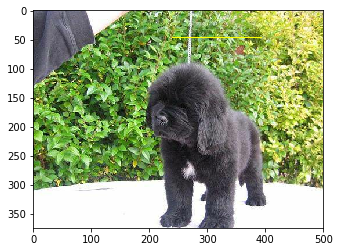

In [9]:
plt.imshow(r_image_with_box[0])

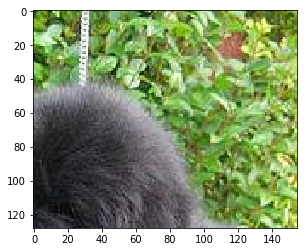

In [10]:
plt.imshow(r_cropped_image)

above picture lose too much information after crop? Is this useful?

## tf.image.random_flip_left_right

Randomly flip an image horizontally (left to right).



In [23]:
flipped_image = tf.image.random_flip_left_right(decoded_image_data)

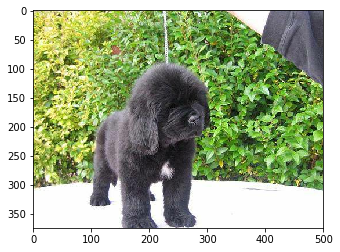

In [24]:
r_flipped_image = sess.run(flipped_image)
plt.imshow(r_flipped_image)

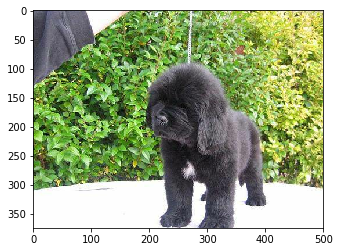

In [26]:
r_flipped_image = sess.run(flipped_image)
plt.imshow(r_flipped_image)

##  Distort Color

* tf.image.random_brightness(image, max_delta=32. / 255.)
* tf.image.random_saturation(image, lower=0.5, upper=1.5)
* tf.image.random_hue(image, max_delta=0.2)
* tf.image.random_contrast(image, lower=0.5, upper=1.5)